# Feature selection vs. Feature Extraction
![image](image.png)


# t-SNE visualization of high-dimensional data

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

ansur_data_f = pd.read_csv('datasets/ANSUR_II_FEMALE.csv')
ansur_data_m = pd.read_csv('datasets/ANSUR_II_MALE.csv')

In [5]:
ansur_data_f.shape, ansur_data_m.shape

((1986, 99), (4082, 99))

In [6]:
# before visaulizing dropping non-numeric data as t-SNE doesnot work with non-numeric data as such
non_numeric = ['BMI_class','Height_class','Gender','Component','Branch']

df_numeric_f = ansur_data_f.drop(non_numeric, axis=1)
df_numeric_f.shape

(1986, 94)

In [8]:
# Fitting t-SNE

from sklearn.manifold import TSNE
# Instantiate TSNE
model = TSNE(learning_rate=50)

# Fit-Transform TSNE model to the numeric dataset
tsne_features = model.fit_transform(df_numeric_f)
tsne_features


array([[ 17.805195  , -11.54689   ],
       [  0.64106935,  37.989273  ],
       [-16.15833   ,  28.581144  ],
       ...,
       [-28.94051   , -13.966705  ],
       [ 13.985782  , -16.543238  ],
       [  9.246489  ,   8.11381   ]], dtype=float32)

In [13]:
tsne_features.shape

(1986, 2)

This project our high-dimensional dataset onto a NumPy array with two dimensions.

In [9]:
# Assigning t-SNE features to our main dataset
ansur_data_f['x'] =tsne_features[:,0]
ansur_data_f['y'] =tsne_features[:,1]

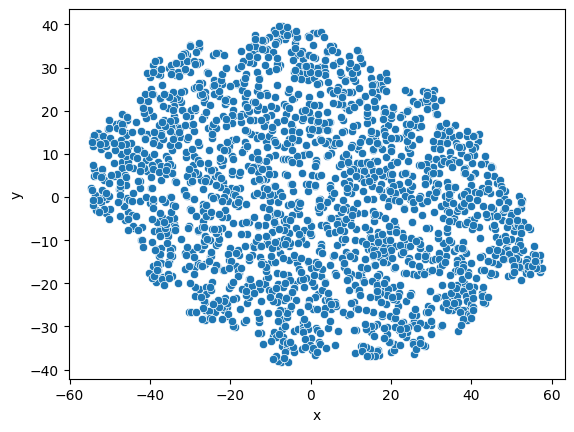

In [10]:
# Plotting t-SNE
sns.scatterplot(x='x',y='y',data=ansur_data_f)
plt.show()

One huge cluster because: There are no distinct groups of female body shapes with little in between, instead there is a more continuous distribution of body shapes.

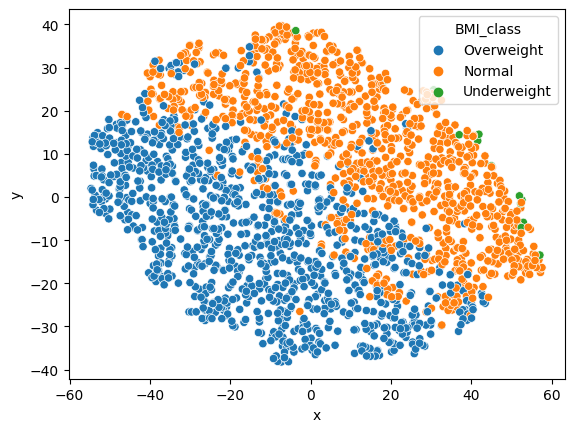

In [11]:
# Coloring points according to BMI category
sns.scatterplot(x='x',y='y',hue='BMI_class',data=ansur_data_f)
plt.show()

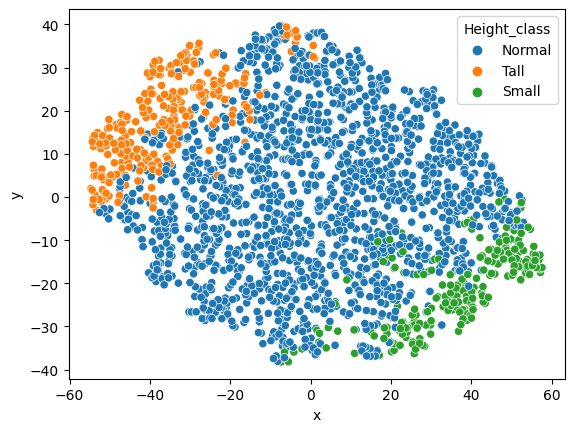

In [12]:
# Coloring points according to height category
sns.scatterplot(x='x',y='y',hue='Height_class',data=ansur_data_f)
plt.show()